#La brecha entre educaicon secundaria y un empleo de calidad

Los datos se tomaron del sitio oficial del INDEC, se tomo la Encuesta permaennte de hogares (EPH).
Problema entorno a la calidad y formato de datos:
- En 2015/2916 se llevo a cabo un cambio de metodología de encuesta, de todos modos lo que yo necesitaba se mantuvieron, pero hasta el 2015 los datos se cargaron en formatos diferentes, como SPSS, y despues a partir de 2016 estan accesibles en excel
- Los datos de sexo son binarios (Mujer o Varon) y no hay otras variables, como genero o genero registrado al nacer genero con el se identifica.
- No hay una encuesta particular centrada en los jóvenes y el mundo del estudio y trabajo

## Cargar datos

#### Archvios excel (2016 a 2022)

In [ ]:
import requests
import zipfile
import io
import pandas as pd
import os

# Definir la ruta de destino para los archivos descargados y extraídos
ruta_destino = r"C:\Users\melin\Desktop\Datos y Genero\datos_tp_final"

# Definir una lista de diccionarios con los detalles de cada trimestre
trimestres = [
    {'año': 2016, 'trimestre': '2T', 'url': 'https://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/EPH_usu_2doTrim_2016_xls.zip'},
    {'año': 2016, 'trimestre': '3T', 'url': 'https://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/EPH_usu_3erTrim_2016_xls.zip'},
    {'año': 2016, 'trimestre': '4T', 'url': 'https://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/EPH_usu_4toTrim_2016_xls.zip'},
    {'año': 2017, 'trimestre': '1T', 'url': 'https://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/EPH_usu_1er_Trim_2017_xls.zip'},
    {'año': 2017, 'trimestre': '2T', 'url': 'https://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/EPH_usu_2_Trim_2017_xls.zip'},
    {'año': 2017, 'trimestre': '3T', 'url': 'https://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/EPH_usu_3_Trim_2017_xls.zip'},
    {'año': 2017, 'trimestre': '4T', 'url': 'https://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/EPH_usu_4_Trim_2017_xls.zip'},
    {'año': 2018, 'trimestre': '1T', 'url': 'https://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/EPH_usu_1_Trim_2018_xls.zip'},
    {'año': 2018, 'trimestre': '2T', 'url': 'https://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/EPH_usu_2_Trim_2018_xls.zip'},
    {'año': 2018, 'trimestre': '3T', 'url': 'https://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/EPH_usu_3_Trim_2018_xls.zip'},
    {'año': 2018, 'trimestre': '4T', 'url': 'https://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/EPH_usu_4_Trim_2018_xls.zip'},
    {'año': 2019, 'trimestre': '1T', 'url': 'https://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/EPH_usu_1_Trim_2019_xls.zip'},
    {'año': 2019, 'trimestre': '2T', 'url': 'https://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/EPH_usu_2_Trim_2019_xls.zip'},
    {'año': 2019, 'trimestre': '3T', 'url': 'https://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/EPH_usu_3_Trim_2019_xls.zip'},
    {'año': 2019, 'trimestre': '4T', 'url': 'https://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/EPH_usu_4_Trim_2019_xls.zip'},
    {'año': 2020, 'trimestre': '1T', 'url': 'https://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/EPH_usu_1_Trim_2020_xls.zip'},
    {'año': 2020, 'trimestre': '2T', 'url': 'https://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/EPH_usu_2_Trim_2020_xls.zip'},
    {'año': 2020, 'trimestre': '3T', 'url': 'https://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/EPH_usu_3_Trim_2020_xls.zip'},
    #{'año': 2020, 'trimestre': '4T', 'url': 'https://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/EPH_usu_4_Trim_2020_xls.zip'},
    #{'año': 2021, 'trimestre': '1T', 'url': 'https://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/EPH_usu_1_Trim_2021_xls.zip'},
    {'año': 2021, 'trimestre': '2T', 'url': 'https://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/EPH_usu_2_Trim_2021_xls.zip'},
    #{'año': 2021, 'trimestre': '3T', 'url': 'https://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/EPH_usu_3_Trim_2021_xls.zip'},
    #{'año': 2021, 'trimestre': '4T', 'url': 'https://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/EPH_usu_4_Trim_2021_xls.zip'},
    #{'año': 2022, 'trimestre': '1T', 'url': 'https://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/EPH_usu_1_Trim_2022_xls.zip'},
    #{'año': 2022, 'trimestre': '2T', 'url': 'https://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/EPH_usu_2_Trim_2022_xls.zip'},
    #{'año': 2022, 'trimestre': '3T', 'url': 'https://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/EPH_usu_3_Trim_2022_xls.zip'},
    #{'año': 2022, 'trimestre': '4T', 'url': 'https://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/EPH_usu_4_Trim_2022_xls.zip'}
]

#Los que estan comentados, son porque por algun motivo no lee ningun archiv (los cargo despues manualmente)

# Descargar y extraer los archivos ZIP trimestrales
for trimestre_info in trimestres:
    año = trimestre_info['año']
    trimestre = trimestre_info['trimestre']
    url = trimestre_info['url']

    # Realizar la solicitud GET para descargar el archivo ZIP
    response = requests.get(url)

    # Extraer el contenido del archivo ZIP
    zip_file = zipfile.ZipFile(io.BytesIO(response.content))

    # Extraer los archivos XLSX del archivo ZIP en la ubicación de destino
    for archivo in zip_file.namelist():
      if archivo.lower().startswith('usu_individual'):
          nombre_archivo = f'{año}_{trimestre}.xls'
          zip_file.extract(archivo, ruta_destino)
          os.rename(os.path.join(ruta_destino, archivo), os.path.join(ruta_destino, nombre_archivo))

    # Cerrar el archivo ZIP
    zip_file.close()


In [ ]:
from google.colab import files

archivos = files.upload()


Saving EPH_usu_personas_4to.trim2020.xls.xlsx to EPH_usu_personas_4to.trim2020.xls.xlsx
Saving usu_individual_T121.xlsx to usu_individual_T121.xlsx
Saving usu_individual_T122.xlsx.xlsx to usu_individual_T122.xlsx.xlsx
Saving usu_individual_T222.xlsx to usu_individual_T222.xlsx
Saving usu_individual_T321.xls.xls to usu_individual_T321.xls.xls
Saving usu_individual_T322.xlsx to usu_individual_T322.xlsx
Saving usu_individual_T421.xlsx to usu_individual_T421.xlsx
Saving usu_individual_T422.xlsx.xlsx to usu_individual_T422.xlsx.xlsx


In [ ]:
df20204 = pd.read_excel('EPH_usu_personas_4to.trim2020.xls.xlsx')
df20211 = pd.read_excel('usu_individual_T121.xlsx')
df20213 = pd.read_excel('usu_individual_T321.xls.xls')
df20214 = pd.read_excel('usu_individual_T421.xlsx')
df20221 = pd.read_excel('usu_individual_T122.xlsx.xlsx')
df20222 = pd.read_excel('usu_individual_T222.xlsx')
df20223 = pd.read_excel('usu_individual_T322.xlsx')
df20224 = pd.read_excel('usu_individual_T422.xlsx.xlsx')
archivos = [df20204, df20211, df20213, df20214, df20221, df20222, df20223, df20224]

In [ ]:
# Combinar los datos trimestrales en una única base de datos
dataframes = []
for trimestre_info in trimestres:

    año = trimestre_info['año']
    trimestre = trimestre_info['trimestre']


    nombre_xls = f'{año}_{trimestre}.xls'
    archivo_xls = os.path.join(ruta_destino, nombre_xls)


    if os.path.exists(archivo_xls):
        df_trimestre = pd.read_excel(archivo_xls)
        dataframes.append(df_trimestre)

for archivo in archivos:
  dataframes.append(archivo)

df_excel = pd.concat(dataframes)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (99315329) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (96425626) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (98984336) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (97454840) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [ ]:
df_excel.columns

Index(['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'COMPONENTE', 'H15',
       'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA',
       ...
       'V19_B', 'IX_TOT', 'IX_MEN10', 'IX_MAYEQ10', 'VII1_1', 'VII1_2',
       'VII2_1', 'VII2_2', 'VII2_3', 'VII2_4'],
      dtype='object', length=242)

In [ ]:
df_excel = df_excel[['ANO4', 'TRIMESTRE', 'REGION', 'CH04', 'CH06', 'NIVEL_ED','ESTADO', 'PP3E_TOT', 'PP07H']]
df_excel.head()

,ANO4,TRIMESTRE,REGION,CH04,CH06,NIVEL_ED,ESTADO,PP3E_TOT,PP07H
0,2016,2,1,1.0,32.0,6.0,1.0,45.0,1.0
1,2016,2,1,2.0,34.0,5.0,1.0,40.0,1.0
2,2016,2,1,1.0,17.0,3.0,3.0,NaN,NaN
3,2016,2,1,1.0,41.0,5.0,1.0,48.0,1.0
4,2016,2,1,2.0,11.0,1.0,3.0,NaN,NaN


#### Archivos SPSS (2012 a 2015)
Se hace en spss y se genera en excel

In [ ]:
from google.colab import files

archivos = files.upload()


Saving spss_eph_20152022.xlsx to spss_eph_20152022.xlsx


In [ ]:
df_spss = pd.read_excel('spss_eph_20152022.xlsx')

In [ ]:
df_spss = df_spss.drop('nro_hogar', axis=1)
df_spss.head()

,ano4,trimestre,region,ch04,ch06,nivel_ed,estado,pp3e_tot,pp07h
0,2015,2,43,2,41,4,3,0.0,0
1,2015,2,43,1,46,3,1,45.0,1
2,2015,2,43,2,26,4,1,25.0,1
3,2015,2,43,1,47,4,1,25.0,1
4,2015,2,43,1,1,7,4,0.0,0


## Creacion de tabla

In [ ]:
print(df_excel.columns)
print(df_spss.columns)

Index(['ANO4', 'TRIMESTRE', 'REGION', 'CH04', 'CH06', 'NIVEL_ED', 'ESTADO',
       'PP3E_TOT', 'PP07H'],
      dtype='object')
Index(['ano4', 'trimestre', 'region', 'ch04', 'ch06', 'nivel_ed', 'estado',
       'pp3e_tot', 'pp07h'],
      dtype='object')


In [ ]:
df_excel = df_excel.rename(columns=str.lower)
print(df_excel.columns)

Index(['ano4', 'trimestre', 'region', 'ch04', 'ch06', 'nivel_ed', 'estado',
       'pp3e_tot', 'pp07h'],
      dtype='object')


In [ ]:
df_completo = pd.concat([df_excel, df_spss], axis=0)
df_completo.ano4.value_counts()

2014    241181
2017    235332
2019    234375
2018    230083
2012    223622
2013    222230
2022    198097
2021    192600
2016    177515
2020    144902
2015    120173
Name: ano4, dtype: int64

In [ ]:
df_completo.rename(columns={
    'ano4': 'año',
    'ch04': 'sexo',
    'ch06': 'edad',
    'estado': 'cond_actividad',
    'pp3e_tot': 'tot_horas_trabajadas',
    'pp07h': 'trabajo_desc_jubi'
}, inplace=True)
df_completo.head()

,año,trimestre,region,sexo,edad,nivel_ed,cond_actividad,tot_horas_trabajadas,trabajo_desc_jubi
0,2016,2,1,1.0,32.0,6.0,1.0,45.0,1.0
1,2016,2,1,2.0,34.0,5.0,1.0,40.0,1.0
2,2016,2,1,1.0,17.0,3.0,3.0,NaN,NaN
3,2016,2,1,1.0,41.0,5.0,1.0,48.0,1.0
4,2016,2,1,2.0,11.0,1.0,3.0,NaN,NaN


In [ ]:
import numpy as np
df_completo['tiene_secu_completo'] = np.where(df_completo.nivel_ed >=4, 1, 0)
df_completo['empleo_de_calidad'] = np.where((df_completo.tot_horas_trabajadas >= 30) & (df_completo.trabajo_desc_jubi  ==1), 1, 0)
df_completo.head()

,año,trimestre,region,sexo,edad,nivel_ed,cond_actividad,tot_horas_trabajadas,trabajo_desc_jubi,tiene_secu_completo,empleo_de_calidad
0,2016,2,1,1.0,32.0,6.0,1.0,45.0,1.0,1,1
1,2016,2,1,2.0,34.0,5.0,1.0,40.0,1.0,1,1
2,2016,2,1,1.0,17.0,3.0,3.0,NaN,NaN,0,0
3,2016,2,1,1.0,41.0,5.0,1.0,48.0,1.0,1,1
4,2016,2,1,2.0,11.0,1.0,3.0,NaN,NaN,0,0


In [ ]:
df_completo['solo_secu_completo'] = np.where(df_completo.nivel_ed == 4,1,0)
df_completo.head()

,año,trimestre,region,sexo,edad,nivel_ed,cond_actividad,tot_horas_trabajadas,trabajo_desc_jubi,tiene_secu_completo,empleo_de_calidad,solo_secu_completo
0,2016,2,1,1.0,32.0,6.0,1.0,45.0,1.0,1,1,0
1,2016,2,1,2.0,34.0,5.0,1.0,40.0,1.0,1,1,0
2,2016,2,1,1.0,17.0,3.0,3.0,NaN,NaN,0,0,0
3,2016,2,1,1.0,41.0,5.0,1.0,48.0,1.0,1,1,0
4,2016,2,1,2.0,11.0,1.0,3.0,NaN,NaN,0,0,0


###Lo guardo (para hacer tablas en spss

In [ ]:
df_completo.to_csv('completo_eph.csv', index=False)

### Creo las tablas que voy a usar

In [ ]:
edades_18_24 = df_completo[(df_completo.edad >= 18) & (df_completo.edad <= 24)]

#Analisis

## Terminalidad de la secundaria

Nivel educativo
si es 4 es secundario completo

In [ ]:
secu_18 = edades_18_24.groupby(['año', 'sexo'])['tiene_secu_completo'].value_counts(normalize=True).mul(100).rename('porcentaje').reset_index()
secu_18

,año,sexo,tiene_secu_completo,porcentaje
0,2012,1.0,1,52.763391
1,2012,1.0,0,47.236609
2,2012,2.0,1,65.238566
3,2012,2.0,0,34.761434
4,2013,1.0,1,52.708188
5,2013,1.0,0,47.291812
6,2013,2.0,1,64.800000
7,2013,2.0,0,35.200000
8,2014,1.0,1,52.785406
9,2014,1.0,0,47.214594


In [ ]:
secu_18_grafico = secu_18[secu_18.tiene_secu_completo ==1]
secu_18_grafico

,año,sexo,tiene_secu_completo,porcentaje
0,2012,1.0,1,52.763391
2,2012,2.0,1,65.238566
4,2013,1.0,1,52.708188
6,2013,2.0,1,64.800000
8,2014,1.0,1,52.785406
10,2014,2.0,1,65.906507
12,2015,1.0,1,53.830174
14,2015,2.0,1,67.486154
16,2016,1.0,1,54.374769
18,2016,2.0,1,67.361766


<ipython-input-20-816cc2b0d244>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  secu_18_grafico['sexo'] = secu_18_grafico['sexo'].replace({1: 'Varón', 2: 'Mujer'})


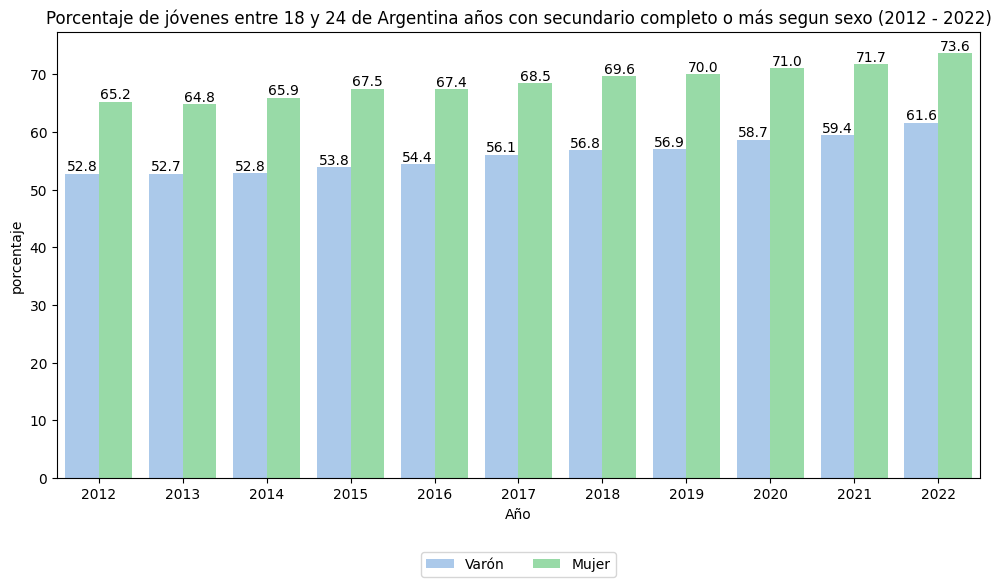

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir una paleta de colores personalizada
colores = ['#a1c9f4', '#8de5a1', '#ff9f9b'] # Puedes ajustar los colores según tus preferencias

plt.figure(figsize=(10, 6))
secu_18_grafico['sexo'] = secu_18_grafico['sexo'].replace({1: 'Varón', 2: 'Mujer'})


# Crear el gráfico de barras utilizando la paleta de colores personalizada
p1 = sns.barplot(data=secu_18_grafico, x='año', y='porcentaje', hue='sexo', palette=colores)

for p in p1.containers:
    p1.bar_label(p, fmt='%.1f', label_type='edge')

# Personalizar etiquetas y título del gráfico
plt.xlabel('Año')
plt.title('Porcentaje de jóvenes entre 18 y 24 de Argentina años con secundario completo o más segun sexo (2012 - 2022)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
# Mostrar el gráfico
plt.tight_layout()  # Ajustar el espaciado general
plt.show()



## Empleo de calidad

In [ ]:
empleo_18 = edades_18_24.groupby(['año', 'solo_secu_completo'])['empleo_de_calidad'].value_counts(normalize=True).mul(100).rename('porcentaje').reset_index()
empleo_18

,año,solo_secu_completo,empleo_de_calidad,porcentaje
0,2012,0,0,91.143928
1,2012,0,1,8.856072
2,2012,1,0,76.797386
3,2012,1,1,23.202614
4,2013,0,0,91.384629
5,2013,0,1,8.615371
6,2013,1,0,78.186730
7,2013,1,1,21.813270
8,2014,0,0,92.279738
9,2014,0,1,7.720262


In [ ]:
empleo_18_grafico = empleo_18[empleo_18.empleo_de_calidad ==1]
empleo_18_grafico

,año,solo_secu_completo,empleo_de_calidad,porcentaje
1,2012,0,1,8.856072
3,2012,1,1,23.202614
5,2013,0,1,8.615371
7,2013,1,1,21.813270
9,2014,0,1,7.720262
11,2014,1,1,20.252203
13,2015,0,1,7.821087
15,2015,1,1,19.402074
17,2016,0,1,6.833575
19,2016,1,1,19.860484


<ipython-input-23-d60abd286e28>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  empleo_18_grafico['solo_secu_completo'] = empleo_18_grafico['solo_secu_completo'].replace({0: 'Secundario incompleto o menos', 1: 'Solo secundario completo'})


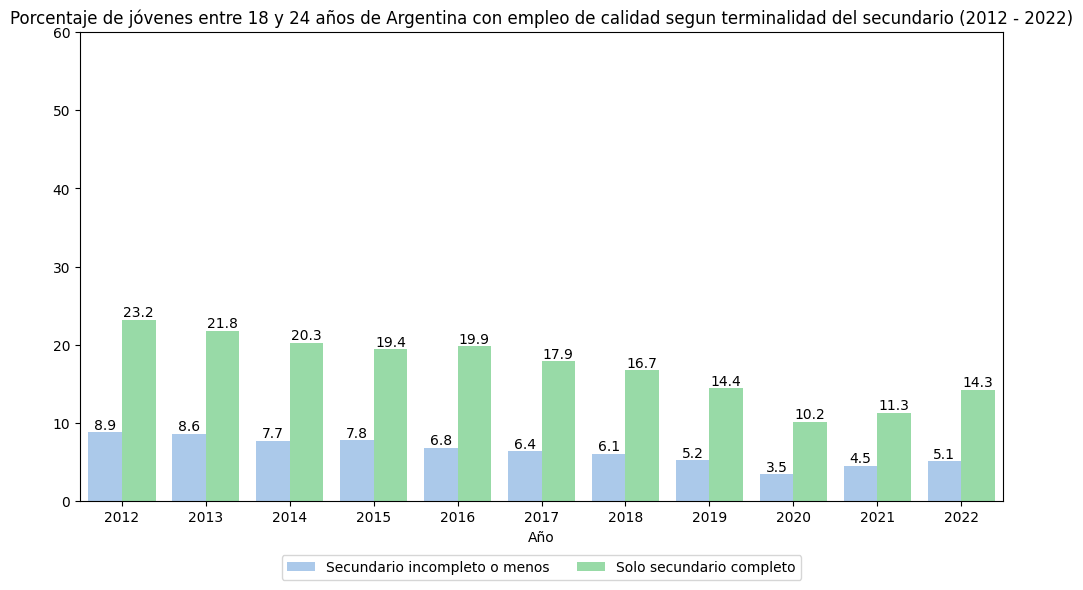

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir una paleta de colores personalizada
colores = ['#a1c9f4', '#8de5a1', '#ff9f9b'] # Puedes ajustar los colores según tus preferencias

plt.figure(figsize=(10, 6))

empleo_18_grafico['solo_secu_completo'] = empleo_18_grafico['solo_secu_completo'].replace({0: 'Secundario incompleto o menos', 1: 'Solo secundario completo'})
# Crear el gráfico de barras utilizando la paleta de colores personalizada
p1 = sns.barplot(data=empleo_18_grafico, x='año', y='porcentaje', hue='solo_secu_completo', palette=colores)

for p in p1.containers:
    p1.bar_label(p, fmt='%.1f', label_type='edge')

# Personalizar etiquetas y título del gráfico
plt.xlabel('Año')
plt.ylabel(' ')
plt.title('Porcentaje de jóvenes entre 18 y 24 años de Argentina con empleo de calidad segun terminalidad del secundario (2012 - 2022)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

plt.ylim(0, 60)

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el espaciado general
plt.show()



#### Con genero

In [ ]:
empleo_sexo_18 = edades_18_24.groupby(['año', 'solo_secu_completo', 'sexo'])['empleo_de_calidad'].value_counts(normalize=True).mul(100).rename('porcentaje').reset_index()
empleo_sexo_18

,año,solo_secu_completo,sexo,empleo_de_calidad,porcentaje
0,2012,0,1.0,0,87.634703
1,2012,0,1.0,1,12.365297
2,2012,0,2.0,0,94.576968
3,2012,0,2.0,1,5.423032
4,2012,1,1.0,0,68.362480
...,...,...,...,...,...
83,2022,0,2.0,1,3.517764
84,2022,1,1.0,0,81.076563
85,2022,1,1.0,1,18.923437
86,2022,1,2.0,0,90.990991


In [ ]:
empleo_sexo_18_grafico = empleo_sexo_18[empleo_sexo_18.empleo_de_calidad == 1]
empleo_sexo_18_grafico

,año,solo_secu_completo,sexo,empleo_de_calidad,porcentaje
1,2012,0,1.0,1,12.365297
3,2012,0,2.0,1,5.423032
5,2012,1,1.0,1,31.637520
7,2012,1,2.0,1,14.285714
9,2013,0,1.0,1,11.844091
11,2013,0,2.0,1,5.340418
13,2013,1,1.0,1,30.128840
15,2013,1,2.0,1,13.121547
17,2014,0,1.0,1,10.296346
19,2014,0,2.0,1,5.124289


<ipython-input-26-9f014d006706>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  empleo_sexo_18_grafico['solo_secu_completo'] = empleo_sexo_18_grafico['solo_secu_completo'].replace({0: 'Secundario incompleto o menos', 1: 'Solo secundario completo'})
<ipython-input-26-9f014d006706>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  empleo_sexo_18_grafico['sexo'] = empleo_sexo_18_grafico['sexo'].replace({1: 'Varón', 2: 'Mujer'})


<Figure size 1200x800 with 0 Axes>

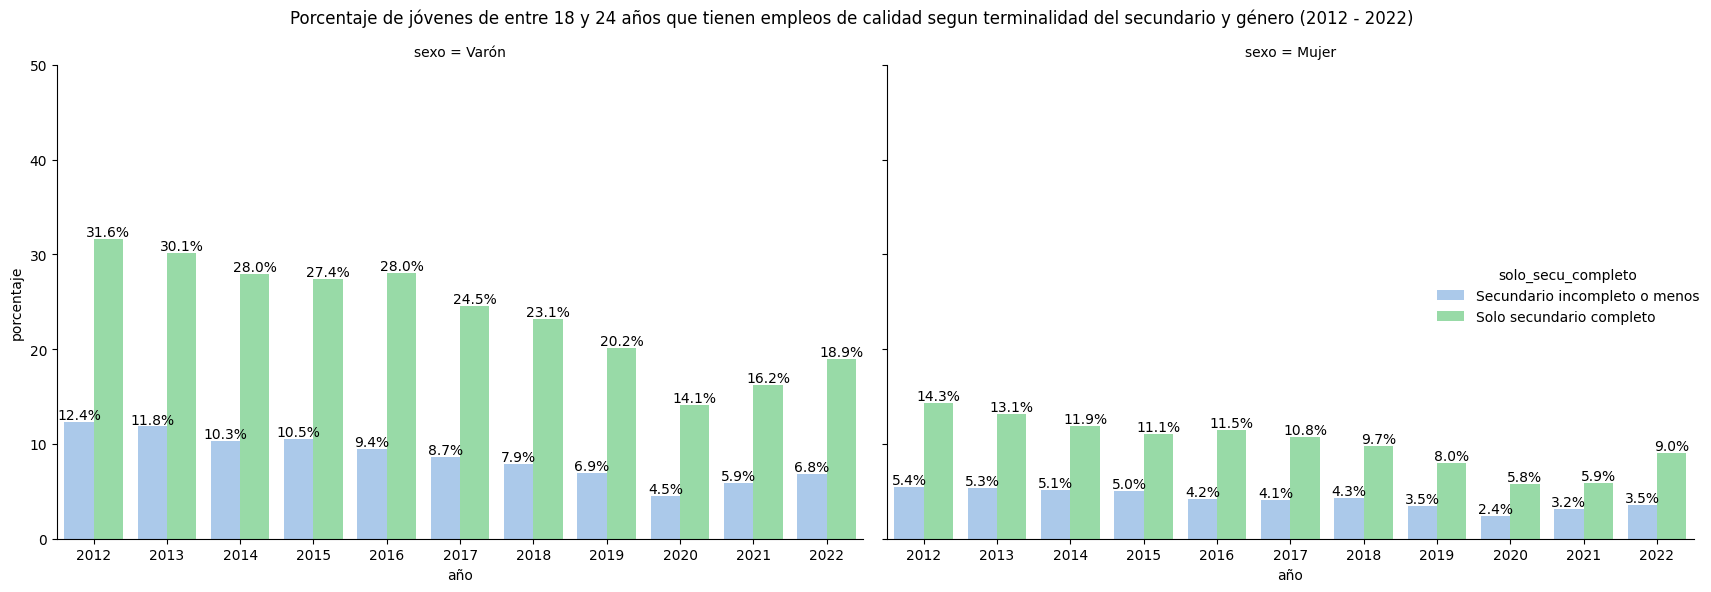

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Definir los colores
colores = ['#a1c9f4', '#8de5a1', '#ff9f9b']
empleo_sexo_18_grafico['solo_secu_completo'] = empleo_sexo_18_grafico['solo_secu_completo'].replace({0: 'Secundario incompleto o menos', 1: 'Solo secundario completo'})
empleo_sexo_18_grafico['sexo'] = empleo_sexo_18_grafico['sexo'].replace({1: 'Varón', 2: 'Mujer'})
# Crear el gráfico de barras
ax = sns.catplot(
    data=empleo_sexo_18_grafico, x="año", y="porcentaje", col="sexo", hue="solo_secu_completo",
    kind="bar", height=6, aspect=1.2, palette=colores)

# Configurar el título del gráfico
plt.subplots_adjust(top=0.9)  # Mover el título hacia arriba
plt.suptitle('Porcentaje de jóvenes de entre 18 y 24 años que tienen empleos de calidad segun terminalidad del secundario y género (2012 - 2022)')
plt.ylabel(' ')
# Agregar los porcentajes encima de las barras
for ax in ax.axes.flat:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f') + '%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.ylim(0,50)
# Mostrar el gráfico
plt.tight_layout()
plt.show()


## universitario

In [ ]:
df_completo.nivel_ed.unique()

array([ 6.,  5.,  3.,  1.,  4.,  2.,  7., nan])

In [ ]:
import numpy as np
df_completo['tiene_univ_completo'] = np.where(df_completo.nivel_ed >=6, 1, 0)
df_completo.head()

,año,trimestre,region,sexo,edad,nivel_ed,cond_actividad,tot_horas_trabajadas,trabajo_desc_jubi,tiene_secu_completo,empleo_de_calidad,solo_secu_completo,tiene_univ_completo
0,2016,2,1,1.0,32.0,6.0,1.0,45.0,1.0,1,1,0,1
1,2016,2,1,2.0,34.0,5.0,1.0,40.0,1.0,1,1,0,0
2,2016,2,1,1.0,17.0,3.0,3.0,NaN,NaN,0,0,0,0
3,2016,2,1,1.0,41.0,5.0,1.0,48.0,1.0,1,1,0,0
4,2016,2,1,2.0,11.0,1.0,3.0,NaN,NaN,0,0,0,0


In [ ]:
df_completo['solo_univ_completo'] = np.where(df_completo.nivel_ed == 6,1,0)
df_completo.head()

,año,trimestre,region,sexo,edad,nivel_ed,cond_actividad,tot_horas_trabajadas,trabajo_desc_jubi,tiene_secu_completo,empleo_de_calidad,solo_secu_completo,tiene_univ_completo,solo_univ_completo
0,2016,2,1,1.0,32.0,6.0,1.0,45.0,1.0,1,1,0,1,1
1,2016,2,1,2.0,34.0,5.0,1.0,40.0,1.0,1,1,0,0,0
2,2016,2,1,1.0,17.0,3.0,3.0,NaN,NaN,0,0,0,0,0
3,2016,2,1,1.0,41.0,5.0,1.0,48.0,1.0,1,1,0,0,0
4,2016,2,1,2.0,11.0,1.0,3.0,NaN,NaN,0,0,0,0,0


In [ ]:
edades_18_24 = df_completo[(df_completo.edad >= 18) & (df_completo.edad <= 24)]

### Terminalidad de la universidad

In [ ]:
edades_22_26 = df_completo[(df_completo.edad >= 22) & (df_completo.edad <= 26)]

In [ ]:
univ_22 = edades_22_26.groupby(['año', 'sexo'])['tiene_univ_completo'].value_counts(normalize=True).mul(100).rename('porcentaje').reset_index()
univ_22

,año,sexo,tiene_univ_completo,porcentaje
0,2012,1.0,0,94.262124
1,2012,1.0,1,5.737876
2,2012,2.0,0,89.320288
3,2012,2.0,1,10.679712
4,2013,1.0,0,94.247182
5,2013,1.0,1,5.752818
6,2013,2.0,0,89.231731
7,2013,2.0,1,10.768269
8,2014,1.0,0,93.706784
9,2014,1.0,1,6.293216


In [ ]:
univ_22_grafico = univ_22[univ_22.tiene_univ_completo ==1]
univ_22_grafico

,año,sexo,tiene_univ_completo,porcentaje
1,2012,1.0,1,5.737876
3,2012,2.0,1,10.679712
5,2013,1.0,1,5.752818
7,2013,2.0,1,10.768269
9,2014,1.0,1,6.293216
11,2014,2.0,1,10.748873
13,2015,1.0,1,5.958195
15,2015,2.0,1,9.600925
17,2016,1.0,1,5.650638
19,2016,2.0,1,10.152493


<ipython-input-40-00304348d521>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  univ_22_grafico['sexo'] = univ_22_grafico['sexo'].replace({1: 'Varón', 2: 'Mujer'})


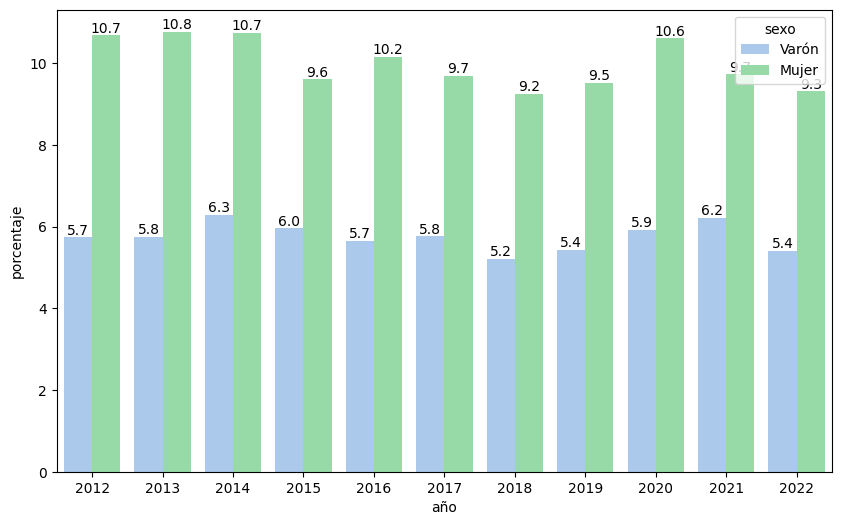

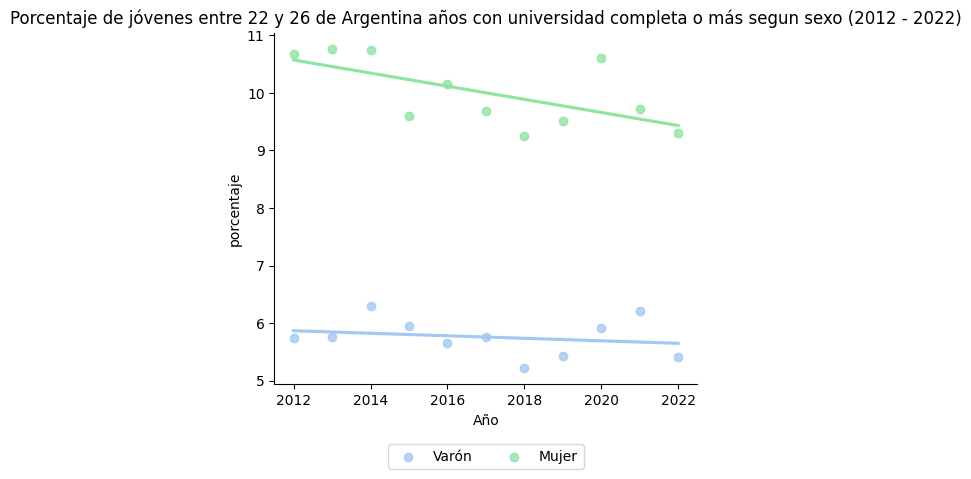

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir una paleta de colores personalizada
colores = ['#a1c9f4', '#8de5a1', '#ff9f9b'] # Puedes ajustar los colores según tus preferencias

plt.figure(figsize=(10, 6))
univ_22_grafico['sexo'] = univ_22_grafico['sexo'].replace({1: 'Varón', 2: 'Mujer'})


# Crear el gráfico de barras utilizando la paleta de colores personalizada
p1 = sns.barplot(data=univ_22_grafico, x='año', y='porcentaje', hue='sexo', palette=colores)

for p in p1.containers:
    p1.bar_label(p, fmt='%.1f', label_type='edge')
sns.lmplot(data=univ_22_grafico, x='año', y='porcentaje', hue='sexo', palette=colores, ci=None, legend=False)
# Personalizar etiquetas y título del gráfico
plt.xlabel('Año')
plt.title('Porcentaje de jóvenes entre 22 y 26 de Argentina años con universidad completa o más segun sexo (2012 - 2022)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
# Mostrar el gráfico
plt.tight_layout()  # Ajustar el espaciado general
plt.show()



## Empleo de calidad

In [ ]:
empleo_22_univ = edades_22_26.groupby(['año', 'solo_univ_completo'])['empleo_de_calidad'].value_counts(normalize=True).mul(100).rename('porcentaje').reset_index()
empleo_22_univ

,año,solo_univ_completo,empleo_de_calidad,porcentaje
0,2012,0,0,77.993236
1,2012,0,1,22.006764
2,2012,1,0,62.548765
3,2012,1,1,37.451235
4,2013,0,0,79.314670
5,2013,0,1,20.685330
6,2013,1,0,63.042071
7,2013,1,1,36.957929
8,2014,0,0,81.293809
9,2014,0,1,18.706191


In [ ]:
empleo_22_univ_grafico = empleo_22_univ[empleo_22_univ.empleo_de_calidad ==1]
empleo_22_univ_grafico

,año,solo_univ_completo,empleo_de_calidad,porcentaje
1,2012,0,1,22.006764
3,2012,1,1,37.451235
5,2013,0,1,20.685330
7,2013,1,1,36.957929
9,2014,0,1,18.706191
11,2014,1,1,35.602094
13,2015,0,1,19.621650
15,2015,1,1,34.134008
17,2016,0,1,17.994231
19,2016,1,1,36.250000


<ipython-input-45-cd5366a7b60d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  empleo_22_univ_grafico['solo_univ_completo'] = empleo_22_univ_grafico['solo_univ_completo'].replace({0: 'Universitario incompleto o menos', 1: 'Solo universidad completa'})


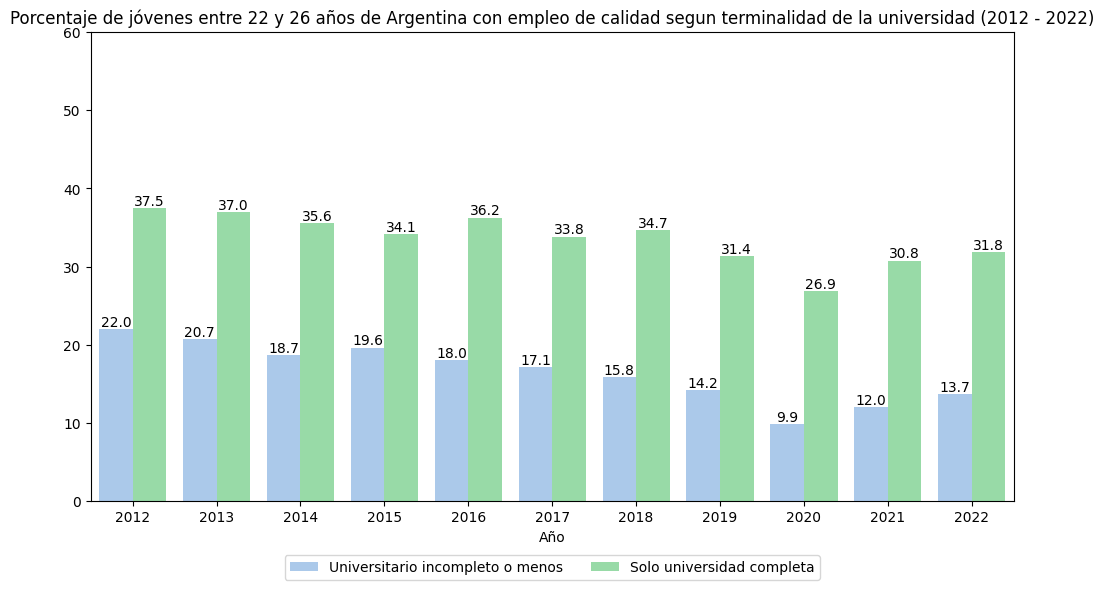

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir una paleta de colores personalizada
colores = ['#a1c9f4', '#8de5a1', '#ff9f9b'] # Puedes ajustar los colores según tus preferencias

plt.figure(figsize=(10, 6))

empleo_22_univ_grafico['solo_univ_completo'] = empleo_22_univ_grafico['solo_univ_completo'].replace({0: 'Universitario incompleto o menos', 1: 'Solo universidad completa'})
# Crear el gráfico de barras utilizando la paleta de colores personalizada
p1 = sns.barplot(data=empleo_22_univ_grafico, x='año', y='porcentaje', hue='solo_univ_completo', palette=colores)

for p in p1.containers:
    p1.bar_label(p, fmt='%.1f', label_type='edge')
#sns.lmplot(data=empleo_22_univ_grafico, x='año', y='porcentaje', hue='solo_univ_completo', palette=colores, ci=None, legend=False)
# Personalizar etiquetas y título del gráfico
plt.xlabel('Año')
plt.ylabel(' ')
plt.title('Porcentaje de jóvenes entre 22 y 26 años de Argentina con empleo de calidad segun terminalidad de la universidad (2012 - 2022)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

plt.ylim(0, 60)

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el espaciado general
plt.show()

